In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from patsy import dmatrix 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import linear_model 
%matplotlib inline 


In [4]:
!wget -nc http://labfile.oss.aliyuncs.com/courses/1034/ipo_data_0.csv

--2021-03-21 01:02:40--  http://labfile.oss.aliyuncs.com/courses/1034/ipo_data_0.csv
Resolving labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 47.110.177.159
Connecting to labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|47.110.177.159|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271042 (265K) [text/csv]
Saving to: ‘ipo_data_0.csv’

ipo_data_0.csv      100%[===================>] 264.69K   158KB/s    in 1.7s    

2021-03-21 01:02:43 (158 KB/s) - ‘ipo_data_0.csv’ saved [271042/271042]



In [2]:
ipos = pd.read_csv(r'ipo_data_0.csv', encoding='latin-1') 
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2002/1/28,Synaptics,SYNA,Bear Stearns,$11.00,$13.11,$13.11,19.18%,$2.11,$2.11,2,NaN
1,2002/2/1,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,$12.00,$12.01,$12.05,0.42%,$0.01,$0.05,1,NaN
2,2002/2/1,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,$28.00,$30.05,$29.10,3.93%,$2.05,$1.10,3,NaN
3,2002/2/5,Sunoco Logistics Partners,SXL,Lehman Brothers,$20.25,$21.25,$22.10,9.14%,$1.00,$1.85,3,NaN
4,2002/2/7,ManTech International,MANT,Jefferies,$16.00,$17.10,$18.21,13.81%,$1.10,$2.21,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2015/10/9,CPI Card Group,PMTS,BMO Capital Markets/ Goldman Sachs/ CIBC,$10.00,$11.00,$12.17,21.70%,$1.00,$2.17,1,NaN
2325,2015/10/14,Capitol Acquisition Corp. III,CLACU,Citigroup/ Deutsche Bank Securities/ Credit Su...,$10.00,$10.00,$10.00,0.00%,$0.00,$0.00,1,NaN
2326,2015/10/14,Cerecor,CERCU,Maxim Group LLC,$6.50,$6.59,$6.40,-1.54%,$0.09,-$0.10,1,NaN
2327,2015/10/14,First Data,FDC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,$16.00,$16.39,$15.75,-1.56%,$0.39,-$0.25,1,NaN


In [ ]:
# 1st Day % Px Chng = ((1st Day Close-Offer Price)/Offer Price )*100

## Data Cleaning

In [6]:
# remove '$' and '%'
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))


,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2002/1/28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN
1,2002/2/1,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN
2,2002/2/1,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN
3,2002/2/5,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN
4,2002/2/7,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2015/10/9,CPI Card Group,PMTS,BMO Capital Markets/ Goldman Sachs/ CIBC,10.00,11.00,12.17,21.70,1.00,2.17,1,NaN
2325,2015/10/14,Capitol Acquisition Corp. III,CLACU,Citigroup/ Deutsche Bank Securities/ Credit Su...,10.00,10.00,10.00,0.00,0.00,0.00,1,NaN
2326,2015/10/14,Cerecor,CERCU,Maxim Group LLC,6.50,6.59,6.40,-1.54,0.09,-0.10,1,NaN
2327,2015/10/14,First Data,FDC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,16.00,16.39,15.75,-1.56,0.39,-0.25,1,NaN


In [7]:
# fill null value with 0
ipos.fillna(0,inplace=True)

In [8]:
# after trying to change the Date type, error comes out: 'Out of bounds nanosecond timestamp: 120-11-01 00:00:00'
ipos[ipos['Date']=='11/120']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
1660,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.00,17.00,18.40,15.00,1.00,2.40,1,0


In [9]:
# Replace the error object with 2012-11-20
ipos.loc[1660,'Date']='2012-11-20'

In [10]:
ipos['Date'] = pd.to_datetime(ipos['Date']) 

In [11]:
# Replace 'N/C' with 0
ipos.replace('N/C',0, inplace=True)

In [12]:
# convert object to float and int
ipos['Offer Price'] = ipos['Offer Price'].astype('float') 
ipos['Opening Price'] = ipos['Opening Price'].astype('float') 
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float') 
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float') 
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float') 
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float') 
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

In [14]:
# 1st Day Percentage Gain Mean
dayPer_mean=ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].mean()

<AxesSubplot:title={'center':'1st Day Mean IPO Percentage Change'}, xlabel='Date'>

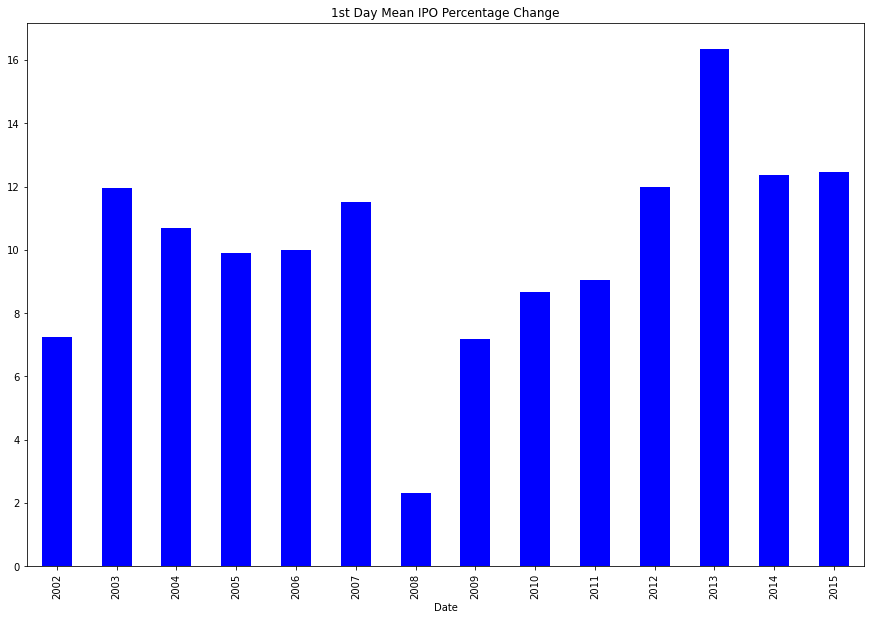

In [15]:
dayPer_mean.plot(kind='bar', figsize=(15,10), color='b', title='1st Day Mean IPO Percentage Change')

<AxesSubplot:title={'center':'1st Day Median IPO Percentage Change'}, xlabel='Date'>

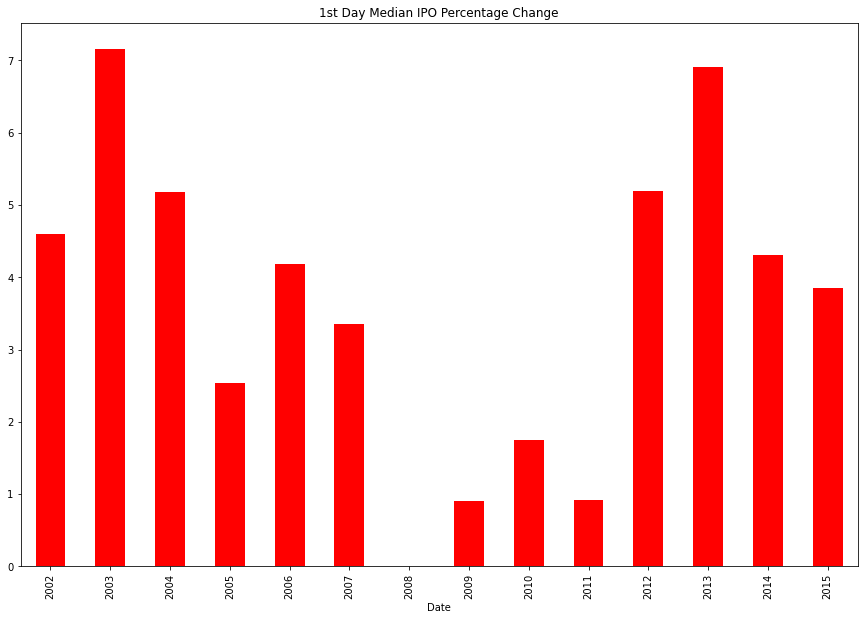

In [16]:
# 1st Day Percentage Gain Median
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].median().plot(kind='bar', figsize=(15,10), color='r', title='1st Day Median IPO Percentage Change')

In [17]:
ipos['1st Day % Px Chng'].describe()

count    2329.000000
mean       11.008429
std        22.617572
min       -35.220000
25%         0.000000
50%         3.670000
75%        16.670000
max       353.850000
Name: 1st Day % Px Chng, dtype: float64

<AxesSubplot:>

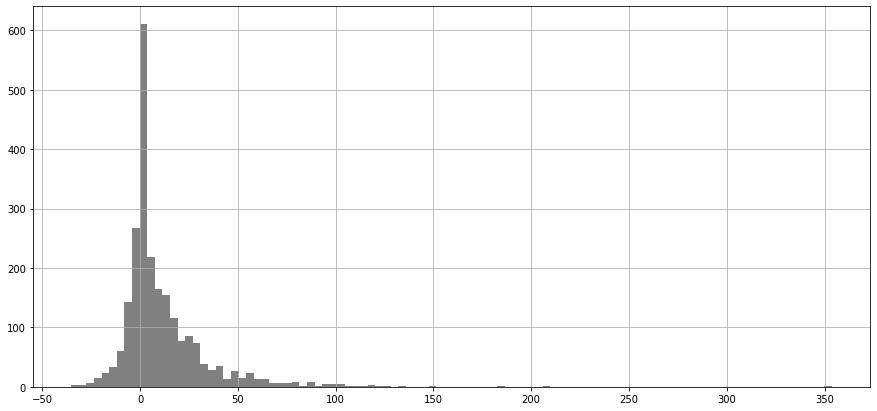

In [18]:
# the most returns are clustered around zero but there is a long tail to the right 
ipos['1st Day % Px Chng'].hist(figsize=(15,7),bins=100, color='grey')

In [19]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening'] 

ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,0,0.00,0.000000
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,0,0.04,0.333056
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,0,-0.95,-3.161398
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,0,0.85,4.000000
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,0,1.11,6.491228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2015-10-09,CPI Card Group,PMTS,BMO Capital Markets/ Goldman Sachs/ CIBC,10.00,11.00,12.17,21.70,1.00,2.17,1,0,1.17,10.636364
2325,2015-10-14,Capitol Acquisition Corp. III,CLACU,Citigroup/ Deutsche Bank Securities/ Credit Su...,10.00,10.00,10.00,0.00,0.00,0.00,1,0,0.00,0.000000
2326,2015-10-14,Cerecor,CERCU,Maxim Group LLC,6.50,6.59,6.40,-1.54,0.09,-0.10,1,0,-0.19,-2.883156
2327,2015-10-14,First Data,FDC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,16.00,16.39,15.75,-1.56,0.39,-0.25,1,0,-0.64,-3.904820


In [20]:
# While IPOs can fall off after their opening, a drop of nearly a 100% (-98.522167) seems unrealistic
ipos['% Chg Open to Close'].describe()

count    2329.000000
mean        0.799005
std         9.387540
min       -98.522167
25%        -2.823920
50%         0.000000
75%         3.686636
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [25]:
# Identifying and correcting the outlier
ipos[ipos['% Chg Open to Close']<-98]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
440,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,0.09,0.22,1,0,-6.0,-98.522167


In [23]:
ipos.loc[440, '$ Chg Opening'] = ipos.loc[440, 'Opening Price']-ipos.loc[440, 'Offer Price']

In [32]:
# Identifying further outliers, at half the original value and correcting it
ipos[ipos['% Chg Open to Close'] < -49]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
440,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.00,6.09,6.22,3.67,0.09,0.22,1,0,-6.00,-98.522167
1264,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,11.26,11.29,0.36,0.01,0.04,1,0,-10.97,-49.281222


In [31]:
ipos.loc[1264, 'Opening Price'] = 11.26
ipos.loc[1264, '$ Chg Opening'] = ipos.loc[1264, 'Opening Price']-ipos.loc[1264, 'Offer Price']

In [33]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening'] 

ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

ipos['% Chg Open to Close'].describe()

count    2329.000000
mean        0.863498
std         9.099885
min       -40.383333
25%        -2.814570
50%         0.000000
75%         3.686636
max       113.333333
Name: % Chg Open to Close, dtype: float64

<AxesSubplot:>

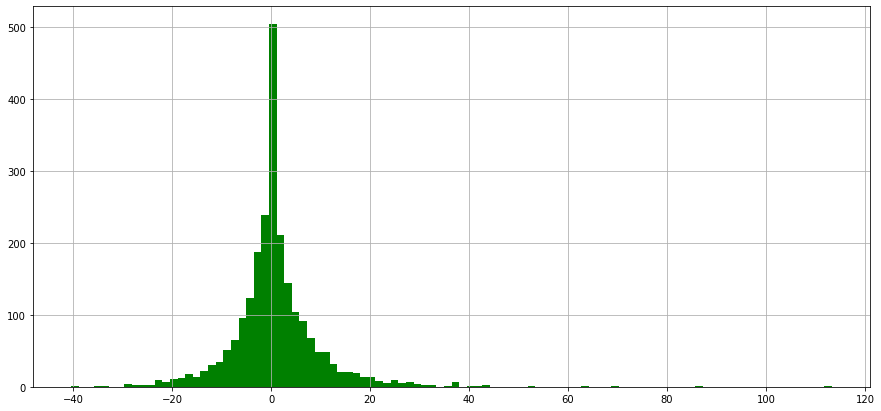

In [34]:
# The long tail on the right shows there is still a ray of hope to take advantage of
ipos['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='green')

# Feature Engineering

In [36]:
sp = pd.read_csv(r'GSPC.csv') 
sp.reset_index(drop=True, inplace=True) 

In [66]:
sp['Date'] = pd.to_datetime(sp['Date']) 
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
4011,2015-12-11,2047.270020,2047.270020,2008.800049,2012.369995,2012.369995,4301060000
4012,2015-12-14,2013.369995,2022.920044,1993.260010,2021.939941,2021.939941,4612440000
4013,2015-12-15,2025.550049,2053.870117,2025.550049,2043.410034,2043.410034,4353540000
4014,2015-12-16,2046.500000,2076.719971,2042.430054,2073.070068,2073.070068,4635450000


In [68]:
#find weekly change
def get_weekly_chg(ipos):
    try:
        day_ago_index = sp[sp['Date'] == str(ipos.date())].index[0] - 1     #yesterday's data
        week_ago_index = day_ago_index - 7    #week's before data
        change = (sp.iloc[day_ago_index]['Close'] - sp.iloc[week_ago_index]['Close']) / sp.iloc[week_ago_index]['Close']
        return change * 100
    except:
        print('error : ', ipos.date())

In [71]:
ipos['SP Week Change'] = ipos['Date'].map(get_weekly_chg)

error :  2009-08-01
error :  2013-11-16
error :  2015-02-21
error :  2015-02-21


In [72]:
ipos[ipos['Date']=='2009-08-01']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
1175,2009-08-01,Emdeon,EM,Morgan Stanley,15.0,17.5,16.52,10.13,2.5,1.52,3,0,-0.98,-5.6,NaN


In [73]:
ipos.loc[1175, 'Date'] = pd.to_datetime('2009-08-12')
ipos.loc[1881, 'Date'] = pd.to_datetime('2013-11-06')
ipos.loc[2211, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[2212, 'Date'] = pd.to_datetime('2015-05-21')

In [74]:
ipos['SP Week Change'] = ipos['Date'].map(get_weekly_chg)

In [77]:
# Close to Opening change
def getCloseToOpenChange(ipos):
    try:
        today_open_idx = sp[sp['Date'] == str(ipos.date())].index[0]          #today's open
        ystrday_close_idx = sp[sp['Date'] == str(ipos.date())].index[0] - 1   #yesterday's close
        change = (sp.iloc[today_open_idx]['Open'] - sp.iloc[ystrday_close_idx]['Close']) \
                / sp.iloc[ystrday_close_idx]['Close']
        return change * 100
    except:
        print('error : ', ipos)

In [79]:
# Apply the get close to open change method
ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(getCloseToOpenChange)

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,0,0.00,0.000000,-1.126333,0.000000
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,0,0.04,0.333056,0.972911,0.000000
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,0,-0.95,-3.161398,0.972911,0.000000
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,0,0.85,4.000000,-3.330838,0.000000
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,0,1.11,6.491228,-4.373118,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2015-10-09,CPI Card Group,PMTS,BMO Capital Markets/ Goldman Sachs/ CIBC,10.00,11.00,12.17,21.70,1.00,2.17,1,0,1.17,10.636364,6.864857,0.014896
2325,2015-10-14,Capitol Acquisition Corp. III,CLACU,Citigroup/ Deutsche Bank Securities/ Credit Su...,10.00,10.00,10.00,0.00,0.00,0.00,1,0,0.00,0.000000,2.681717,-0.001493
2326,2015-10-14,Cerecor,CERCU,Maxim Group LLC,6.50,6.59,6.40,-1.54,0.09,-0.10,1,0,-0.19,-2.883156,2.681717,-0.001493
2327,2015-10-14,First Data,FDC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,16.00,16.39,15.75,-1.56,0.39,-0.25,1,0,-0.64,-3.904820,2.681717,-0.001493


In [86]:
# cleanup lead managers with the first one
ipos['Lead Managers'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: x.split('/')[0]).map(lambda x: x.strip())

In [90]:
# add total number of underwriters for each IPO
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: len(x.split('/')))

In [91]:
# Add the week days and the month columns
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed',\
                                                  3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
ipos['Month'] = ipos['Date'].map(lambda x: x.month)
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Managers,Total Underwriters,Week Day,Month
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,0,0.00,0.000000,-1.126333,0.0,Bear Stearns,1,Mon,Jan
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,0,0.04,0.333056,0.972911,0.0,Lehman Brothers,2,Fri,Feb
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,0,-0.95,-3.161398,0.972911,0.0,Salomon Smith Barney,2,Fri,Feb
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,0,0.85,4.000000,-3.330838,0.0,Lehman Brothers,1,Tues,Feb
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,0,1.11,6.491228,-4.373118,0.0,Jefferies,1,Thurs,Feb


In [92]:
# Add Open Gap %
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100

<AxesSubplot:>

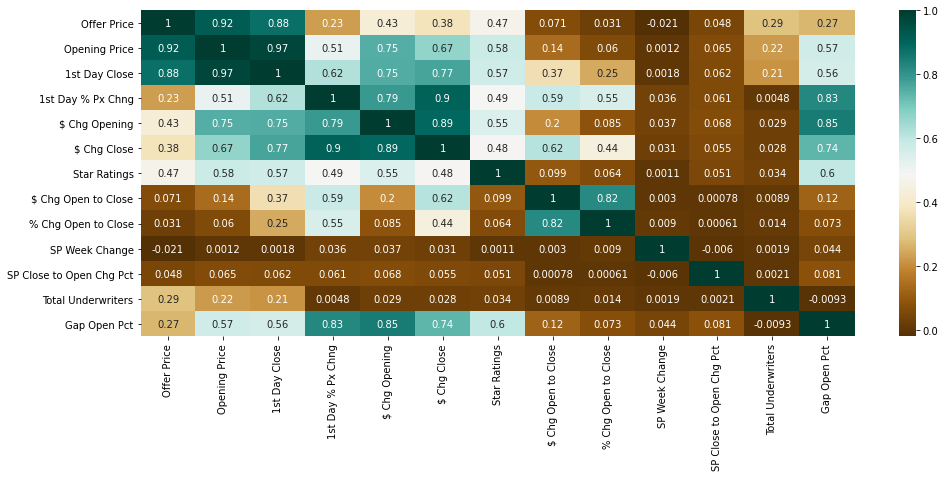

In [104]:
plt.figure(figsize=(16, 6))
sns.heatmap(ipos.corr(),annot=True,cmap='BrBG')


# Split Train and Test

In [106]:
# Patsy to perform data analysis tasks
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") +Q("Gap Open Pct") + Q("$ Chg Opening") + Q("Lead Managers") + \
            Q("Offer Price") + Q("Opening Price") + Q("SP Close to Open Chg Pct") + \
            Q("SP Week Change")', data=ipos, return_type='dataframe')
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Managers"")[T.William Blair & Company]","Q(""Lead Managers"")[T.Wunderlich]","Q(""Lead Managers"")[T.Wunderlich Securities]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,16.094584,2.11,11.00,13.11,0.000000,-1.126333
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.083264,0.01,12.00,12.01,0.000000,0.972911
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.821963,2.05,28.00,30.05,0.000000,0.972911
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.705882,1.00,20.25,21.25,0.000000,-3.330838
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.432749,1.10,16.00,17.10,0.000000,-4.373118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,9.090909,1.00,10.00,11.00,0.014896,6.864857
2325,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.000000,0.00,10.00,10.00,-0.001493,2.681717
2326,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.365706,0.09,6.50,6.59,-0.001493,2.681717
2327,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.0,2.379500,0.39,16.00,16.39,-0.001493,2.681717


In [115]:
# identify the index of 2015 starting is 2188
ipos[ipos['Date'].dt.year==2015]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Managers,Total Underwriters,Week Day,Month,Gap Open Pct
2188,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.0,13.49,13.50,-3.57,-0.51,-0.50,...,0,0.01,0.074129,-0.496349,-0.021079,UBS Investment Bank,3,Fri,Jan,-3.780578
2189,2015-01-27,Zosano Pharma (ZSAN),ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.0,12.16,11.10,0.91,1.16,0.10,...,0,-1.06,-8.717105,2.278166,-0.448697,Ladenburg Thalmann,2,Tues,Jan,9.539474
2190,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.0,21.50,18.83,4.61,3.50,0.83,...,0,-2.67,-12.418605,1.850783,0.137465,BofA Merrill Lynch,2,Wed,Jan,16.279070
2191,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.0,19.26,22.00,29.41,2.26,5.00,...,0,2.74,14.226376,-0.854701,0.014480,BofA Merrill Lynch,2,Thurs,Jan,11.734164
2192,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.0,19.00,14.95,-6.56,3.00,-1.05,...,0,-4.05,-21.315789,-0.854701,0.014480,Jefferies,2,Thurs,Jan,15.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2015-10-09,CPI Card Group,PMTS,BMO Capital Markets/ Goldman Sachs/ CIBC,10.0,11.00,12.17,21.70,1.00,2.17,...,0,1.17,10.636364,6.864857,0.014896,BMO Capital Markets,3,Fri,Oct,9.090909
2325,2015-10-14,Capitol Acquisition Corp. III,CLACU,Citigroup/ Deutsche Bank Securities/ Credit Su...,10.0,10.00,10.00,0.00,0.00,0.00,...,0,0.00,0.000000,2.681717,-0.001493,Citigroup,3,Wed,Oct,0.000000
2326,2015-10-14,Cerecor,CERCU,Maxim Group LLC,6.5,6.59,6.40,-1.54,0.09,-0.10,...,0,-0.19,-2.883156,2.681717,-0.001493,Maxim Group LLC,1,Wed,Oct,1.365706
2327,2015-10-14,First Data,FDC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,16.0,16.39,15.75,-1.56,0.39,-0.25,...,0,-0.64,-3.904820,2.681717,-0.001493,Citigroup,13,Wed,Oct,2.379500


In [126]:
# test the 2015 data, train all previous year
idx = 2188
X_train, X_test = X[:idx], X[idx:]
y_train = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= 1 else 0)
y_test = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= 1 else 0)

In [132]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2188, 254)
X_test shape:  (141, 254)
y_train shape:  (2188,)
y_test shape:  (141,)


# Machine Learing

In [133]:
# Fit the model using Logisitic Regression
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

/Users/maxzhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [134]:
# Testing the model accuracy
clf.score(X_test, y_test)

0.8368794326241135

In [135]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].describe()

count    141.000000
mean       0.151702
std        2.603392
min       -6.160000
25%       -0.720000
50%        0.000000
75%        0.660000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [136]:
pred_label = clf.predict(X_test)

results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf

,index,$ chg,predicted,actual,correct
0,2188,0.01,0,0,1
1,2189,-1.06,0,0,1
2,2190,-2.67,0,0,1
3,2191,2.74,0,1,0
4,2192,-4.05,0,0,1
...,...,...,...,...,...
136,2324,1.17,0,1,0
137,2325,0.00,0,0,1
138,2326,-0.19,0,0,1
139,2327,-0.64,0,0,1


In [137]:
rf[rf['predicted']==1]['$ chg'].describe()

count     7.000000
mean      3.822857
std       7.981881
min      -2.320000
25%      -0.860000
50%       0.190000
75%       5.285000
max      20.040000
Name: $ chg, dtype: float64

Text(0.5, 0, 'Index')

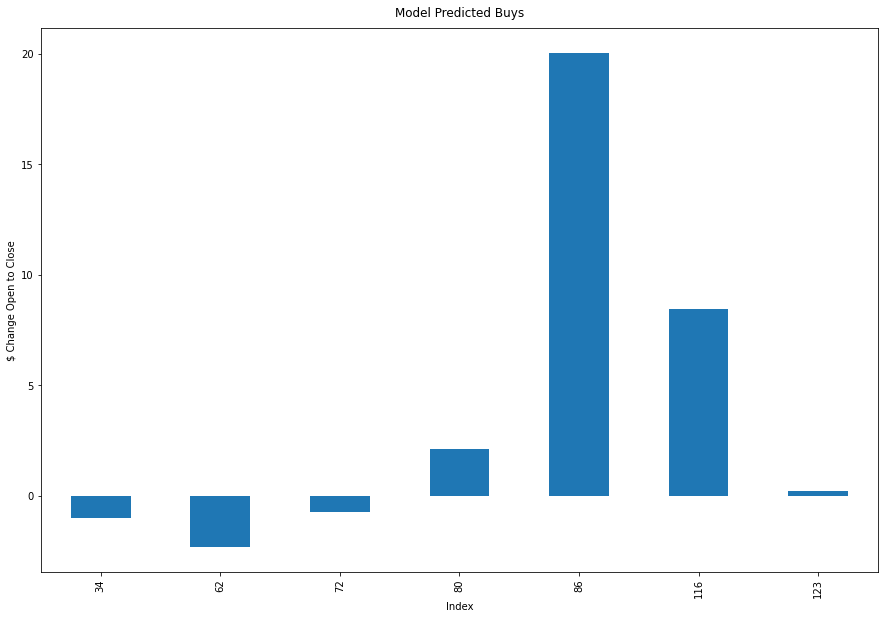

In [138]:
# plot of returns
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [139]:
# set threshold from $1 to $0.25 
idx = 2188
X_train, X_test = X[:idx], X[idx:]
y_train = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= .25 else 0)
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/maxzhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5673758865248227

In [140]:
pred_label = clf.predict(X_test)

results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    25.000000
mean      1.105600
std       5.353659
min      -6.160000
25%      -1.470000
50%      -0.120000
75%       2.000000
max      20.040000
Name: $ chg, dtype: float64

In [141]:
fv = pd.DataFrame(X_train.columns, np.squeeze(clf.coef_.T)).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,0.948857,"Q(""Lead Managers"")[T.Merrill Lynch]"
1,0.934327,"Q(""Lead Managers"")[T.Goldman, Sachs]"
2,0.636232,"Q(""Lead Managers"")[T.J.P. Morgan]"
3,0.572872,"Q(""Lead Managers"")[T.Friedman Billings Ramsey]"
4,0.497501,"Q(""Lead Managers"")[T.Keefe, Bruyette & Woods]"
...,...,...
249,-0.535941,"Q(""Lead Managers"")[T.Lazard Capital Markets]"
250,-0.591490,"Q(""Lead Managers"")[T.JP Morgan]"
251,-0.652726,Intercept
252,-0.788602,"Q(""Lead Managers"")[T.Morgan Joseph]"


In [142]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,0.046191,"Q(""Week Day"")[T.Mon]"
13,0.147637,"Q(""Week Day"")[T.Thurs]"
14,-0.009831,"Q(""Week Day"")[T.Tues]"
15,0.033342,"Q(""Week Day"")[T.Wed]"


## RamdomForest

([<matplotlib.axis.XTick at 0x1a3e558810>,
 [Text(0, 0, 'Q("Gap Open Pct")'),
  Text(1, 0, 'Q("$ Chg Opening")'),
  Text(2, 0, 'Q("Opening Price")'),
  Text(3, 0, 'Q("SP Week Change")'),
  Text(4, 0, 'Q("Offer Price")'),
  Text(5, 0, 'Q("SP Close to Open Chg Pct")'),
  Text(6, 0, 'Q("Total Underwriters")'),
  Text(7, 0, 'Q("Week Day")[T.Thurs]'),
  Text(8, 0, 'Q("Week Day")[T.Wed]'),
  Text(9, 0, 'Q("Lead Managers")[T.Goldman Sachs]'),
  Text(10, 0, 'Q("Week Day")[T.Tues]'),
  Text(11, 0, 'Q("Lead Managers")[T.Morgan Stanley]'),
  Text(12, 0, 'Month[T.Nov]'),
  Text(13, 0, 'Month[T.Oct]'),
  Text(14, 0, 'Month[T.Dec]'),
  Text(15, 0, 'Month[T.Mar]'),
  Text(16, 0, 'Month[T.Jun]'),
  Text(17, 0, 'Month[T.May]'),
  Text(18, 0, 'Q("Lead Managers")[T.Credit Suisse]'),
  Text(19, 0, 'Month[T.Jul]')])

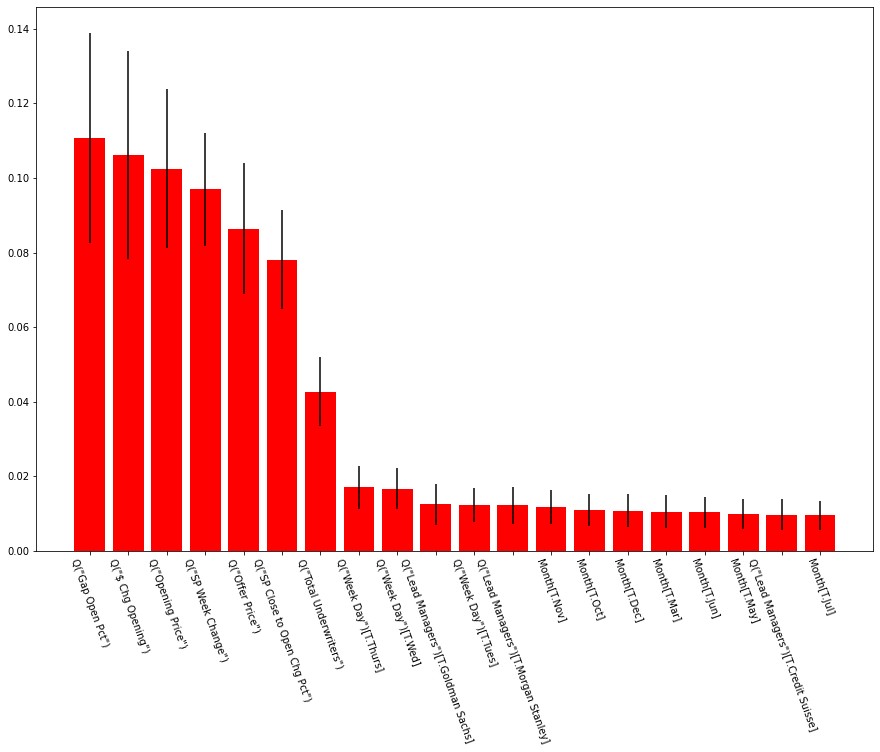

In [143]:
clf_rf = RandomForestClassifier(n_estimators=5000)
model = clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70)